In [1]:
def is_valid_move(x,y,maze,visited):
    rows = len(maze)
    col = len(maze[0])
    is_valid = (0<=x<rows) and (0<=y<col) and (maze[x][y] != 0) and (visited[x][y] == 0)
    return is_valid

In [3]:
from collections import deque
import numpy as np

DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def bfs_maze_solver(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    visited = np.zeros((rows,cols))
    queue = deque([(start, [start])])
    visited[start[0]][start[1]] = True
    nodes_explored = 0

    while queue:
        (x, y), path = queue.popleft()
        nodes_explored += 1

        if (x, y) == end:
            return path, nodes_explored  

        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid_move(nx, ny, maze, visited):
                visited[nx][ny] = True
                queue.append(((nx, ny), path + [(nx, ny)]))
    
    return [], nodes_explored

In [4]:
def dfs_maze_solver(maze, start, end):
    rows, cols = len(maze), len(maze[0])
    visited = np.zeros((rows,cols))
    stack = [(start, [start])]
    nodes_explored = 0

    while stack:
        (x, y), path = stack.pop()
        nodes_explored += 1

        if (x, y) == end:
            return path, nodes_explored  

        if not visited[x][y]:
            visited[x][y] = True
            for dx, dy in DIRECTIONS:
                nx, ny = x + dx, y + dy
                if is_valid_move(nx, ny, maze, visited):
                    stack.append(((nx, ny), path + [(nx, ny)]))
    
    return [], nodes_explored 

In [5]:
import matplotlib.pyplot as plt

In [6]:
def visualize_maze(maze, path, title):
    rows, cols = len(maze), len(maze[0])
    maze_visual = np.array(maze)
    
   
    for x, y in path:
        maze_visual[x][y] = 2 
    
    
    cmap = plt.cm.get_cmap('viridis', 3) 
    plt.imshow(maze_visual, cmap=cmap, interpolation='nearest')
    
    
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(color='black', linestyle='-', linewidth=1)
    
  
    plt.title(title)
    plt.colorbar(ticks=[0, 1, 2], label="Legend (0=Wall, 1=Path, 2=Solution)")
    plt.show()


BFS Results:
Shortest Path: [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Nodes Explored: 15


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11924\3863370830.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3)


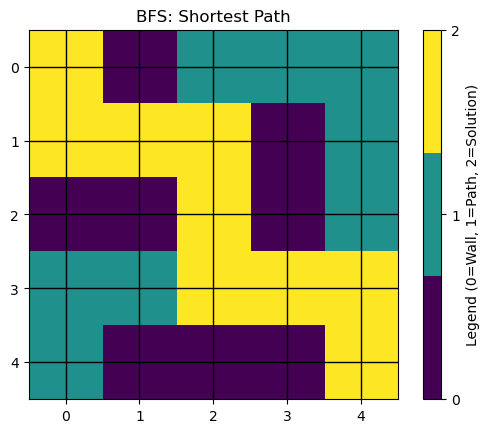


DFS Results:
One Valid Path: [(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
Nodes Explored: 11


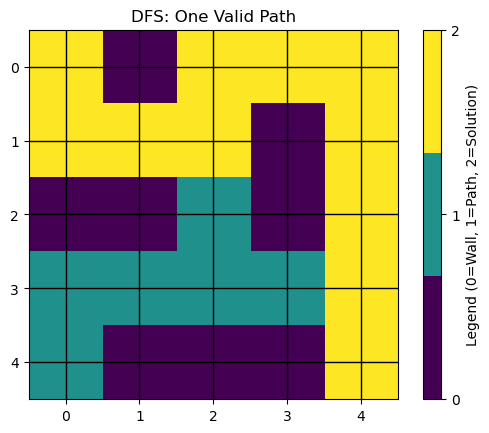


Comparison:
BFS Nodes Explored: 15
DFS Nodes Explored: 11


In [9]:
if __name__ == "__main__":
    maze =  [[1,0,1,1,1],
        [1,1,1,0,1],
        [0,0,1,0,1],
        [1,1,1,1,1],
        [1,0,0,0,1]]

    start = (0, 0) 
    end = (4, 4)    

    bfs_path, bfs_nodes_explored = bfs_maze_solver(maze, start, end)
    print("\nBFS Results:")
    print("Shortest Path:", bfs_path if bfs_path else "No Path Found")
    print("Nodes Explored:", bfs_nodes_explored)
    visualize_maze(maze, bfs_path, "BFS: Shortest Path")

    dfs_path, dfs_nodes_explored = dfs_maze_solver(maze, start, end)
    print("\nDFS Results:")
    print("One Valid Path:", dfs_path if dfs_path else "No Path Found")
    print("Nodes Explored:", dfs_nodes_explored)
    visualize_maze(maze, dfs_path, "DFS: One Valid Path")

    print("\nComparison:")
    print("BFS Nodes Explored:", bfs_nodes_explored)
    print("DFS Nodes Explored:", dfs_nodes_explored)